In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d=pd.read_csv('/content/drive/MyDrive/titanictrain.csv')
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


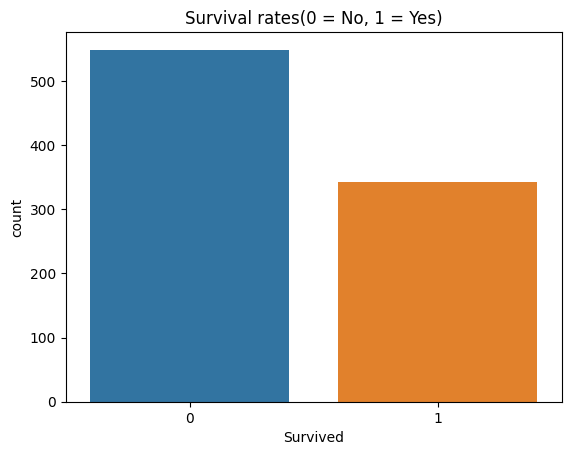

In [ ]:
sns.countplot(x='Survived',data=d)
plt.title('Survival rates(0 = No, 1 = Yes)')
plt.show()

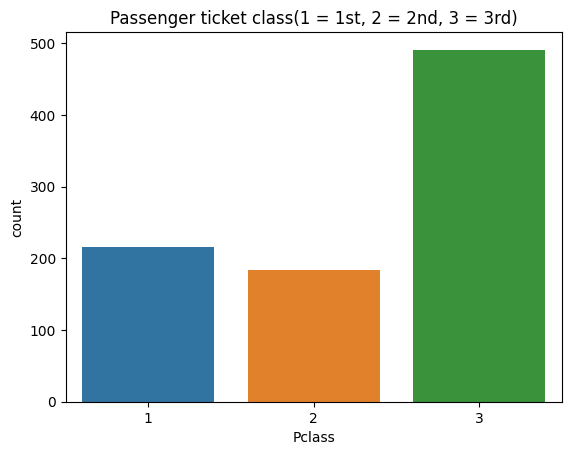

In [ ]:
sns.countplot(x='Pclass',data=d)
plt.title('Passenger ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()

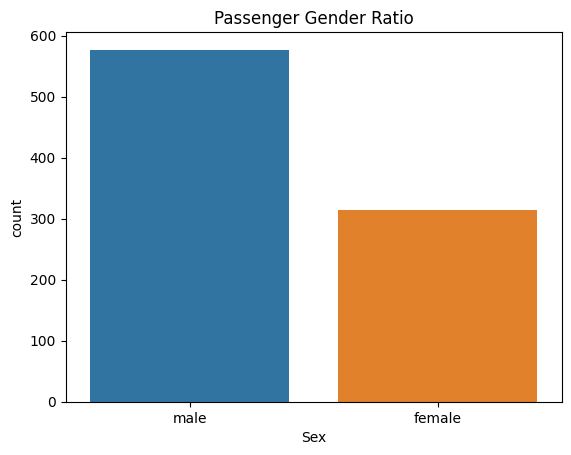

In [ ]:
sns.countplot(x='Sex',data=d)
plt.title('Passenger Gender Ratio')
plt.show()

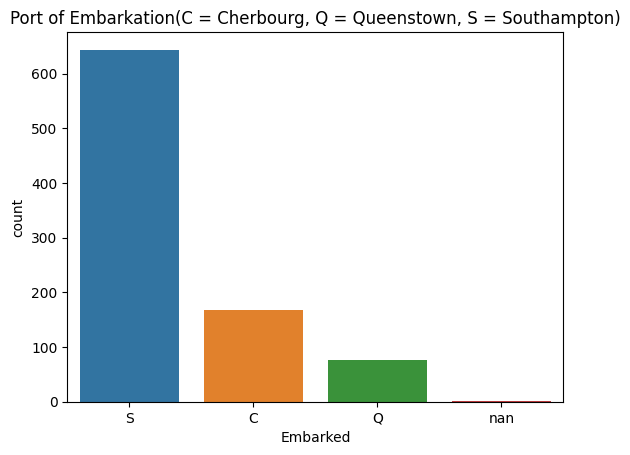

In [ ]:
d=d.astype({'Embarked':str})
sns.countplot(x='Embarked',data=d)
plt.title('Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()

In [ ]:
df=d.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
clean={
    'Sex':{'male':0,'female':1}
    }
df=df.replace(clean)
df=df.fillna({'Age':df['Age'].mean()})
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
Xtrain.shape

(712, 6)

In [ ]:
Xtest.shape

(179, 6)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(Xtrain,ytrain)
ytpred=m.predict(Xtrain)
ypred=m.predict(Xtest)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

trac=accuracy_score(ytrain,ytpred)
tsac=accuracy_score(ytest,ypred)
print("Training Accuracy:",trac)
print("Testing Accuracy:",tsac)

Training Accuracy: 0.9817415730337079
Testing Accuracy: 0.8212290502793296


In [ ]:
cr=classification_report(ytest,ypred)
print("Testing classification report:\n",cr)

Testing classification report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       110
           1       0.82      0.68      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



[[100  10]
 [ 22  47]]


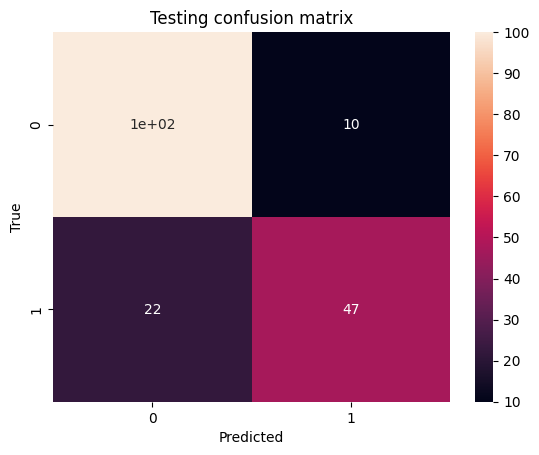

In [ ]:
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(data=cm,annot=True)
plt.title('Testing confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()